In [152]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


c:\Users\shenz\Desktop\gitrepos\SqlLab\.venv\Scripts\python.exe: No module named pip


In [1]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt 

#with duckdb.connect("sakila.duckdb") as conn:

    #run the load_sakila.sql file, but not needed since i already did that with .read load_sakila.sql
    #conn.execute(open("sql/load_sakila.sql").read())

    #test1 = conn.sql("""
        #SELECT * FROM sakila.film;~
    #""").df()

    #print(test1)
conn = duckdb.connect("sakila.duckdb")

test1 = conn.sql(""" 
        SELECT * 
        FROM sakila.film;
""").df()

test1.head(2)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00


In [2]:
movies_longer_than_3h = conn.sql("""
    SELECT title, length 
    FROM sakila.film WHERE length > 180;


""").df()

movies_longer_than_3h

,title,length
0,ANALYZE HOOSIERS,181
1,BAKED CLEOPATRA,182
2,CATCH AMISTAD,183
3,CHICAGO NORTH,185
4,CONSPIRACY SPIRIT,184
5,CONTROL ANTHEM,185
6,CRYSTAL BREAKING,184
7,DARN FORRESTER,185
8,FRONTIER CABIN,183
9,GANGS PRIDE,185


In [3]:
titles_with_word_love = conn.sql("""
    SELECT title, rating, length, description
    FROM sakila.film 
    WHERE title ILIKE '%love%';

""").df()

titles_with_word_love

,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,IDENTITY LOVER,PG-13,119,A Boring Tale of a Composer And a Mad Cow who ...
3,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
4,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
5,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...
6,LOVELY JINGLE,PG,65,A Fanciful Yarn of a Crocodile And a Forensic ...
7,LOVER TRUMAN,G,75,A Emotional Yarn of a Robot And a Boy who must...
8,LOVERBOY ATTACKS,PG-13,162,A Boring Story of a Car And a Butler who must ...
9,STRANGELOVE DESIRE,NC-17,103,A Awe-Inspiring Panorama of a Lumberjack And a...


In [4]:
shortest_length = conn.sql("""
    SELECT 
         MIN(length) AS shortest_length
    FROM sakila.film;

""").df()

average_length = conn.sql("""
    SELECT 
        AVG(length) AS average_length
    FROM sakila.film;
""").df()

median_length_operation = conn.sql("""
    SELECT length
    FROM sakila.film;
""").df()
median_length = median_length_operation["length"].median()

longest_length = conn.sql("""
    SELECT MAX(length)
    FROM sakila.film;
""").df()

In [5]:
shortest_length

,shortest_length
0,46


In [6]:
average_length

,average_length
0,115.272


In [7]:
print(f"median film length:{median_length}")

median film length:114.0


In [8]:
longest_length

,max(length)
0,185


In [9]:
top_10_most_expensive_per_day = conn.sql("""
    SELECT title, rental_duration, rental_rate, rental_rate / rental_duration AS rent_per_day
    FROM sakila.film
    ORDER BY rent_per_day DESC
    LIMIT 10;
""").df()

In [10]:
top_10_most_expensive_per_day

,title,rental_duration,rental_rate,rent_per_day
0,AMERICAN CIRCUS,3,4.99,1.663333
1,BACKLASH UNDEFEATED,3,4.99,1.663333
2,BILKO ANONYMOUS,3,4.99,1.663333
3,BEAST HUNCHBACK,3,4.99,1.663333
4,CARIBBEAN LIBERTY,3,4.99,1.663333
5,AUTUMN CROW,3,4.99,1.663333
6,CASPER DRAGONFLY,3,4.99,1.663333
7,ACE GOLDFINGER,3,4.99,1.663333
8,BEHAVIOR RUNAWAY,3,4.99,1.663333
9,CASUALTIES ENCINO,3,4.99,1.663333


In [11]:
actorbalaba = conn.sql(""" 
    
    SELECT actor.actor_id, actor.first_name, actor.last_name, COUNT(film_actor.film_id) AS number_of_films
    FROM sakila.actor
    JOIN sakila.film_actor
    ON film_actor.actor_id = actor.actor_id
                       
    GROUP BY 
    actor.first_name, actor.last_name, actor.actor_id
    ORDER BY number_of_films DESC
    LIMIT 10;

                       
""").df() 


actorbalaba


,actor_id,first_name,last_name,number_of_films
0,107.0,GINA,DEGENERES,42
1,102.0,WALTER,TORN,41
2,198.0,MARY,KEITEL,40
3,181.0,MATTHEW,CARREY,39
4,23.0,SANDRA,KILMER,37
5,81.0,SCARLETT,DAMON,36
6,106.0,GROUCHO,DUNST,35
7,144.0,ANGELA,WITHERSPOON,35
8,158.0,VIVIEN,BASINGER,35
9,60.0,HENRY,BERRY,35


In [12]:
#most popular 5 categories

top5categories = conn.sql("""
SELECT category.name, COUNT(film_category.film_id)
FROM sakila.category
JOIN sakila.film_category
ON category.category_id = film_category.category_id

GROUP BY category.name
ORDER BY COUNT(film_category.film_id) DESC
LIMIT 5;


""").df()

top5categories

,name,count(film_category.film_id)
0,Sports,74
1,Foreign,73
2,Family,69
3,Documentary,68
4,Animation,66


In [ ]:
plt.ylim(0, top3customers["amount_of_orders"].max() + 

In [13]:
#top 3 customers with most order of rentings 
top3customers = conn.sql("""
    SELECT first_name, COUNT(payment.payment_id) AS amount_of_orders
    FROM sakila.customer
    JOIN sakila.payment                 
    ON payment.customer_id = customer.customer_id
    GROUP BY customer.customer_id, first_name
    ORDER BY amount_of_orders DESC
    LIMIT 3;
""").df()

top3customers

,first_name,amount_of_orders
0,ELEANOR,46
1,KARL,45
2,MARCIA,42


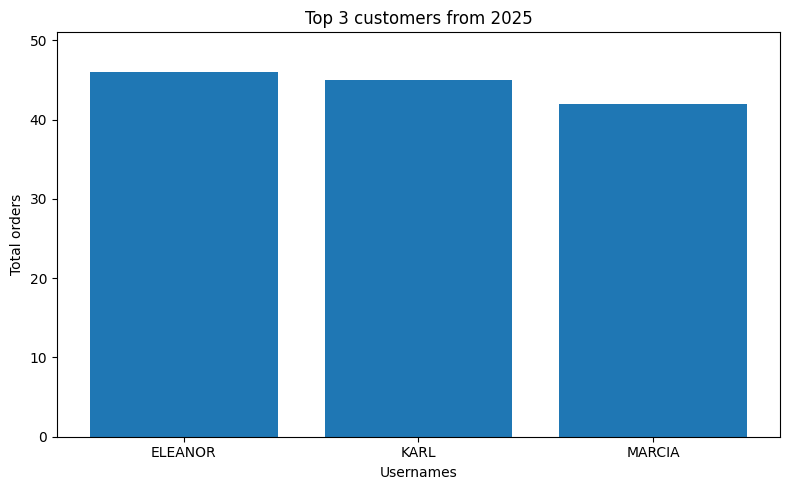

In [28]:
plt.figure(figsize=(8,5))
plt.bar(
    top3customers["first_name"],
    top3customers["amount_of_orders"]
)
plt.title("Top 3 customers from 2025")
plt.xlabel("Usernames")
plt.ylabel("Total orders")
plt.ylim(0, top3customers["amount_of_orders"].max() + 5)
plt.tight_layout()
plt.show()

In [23]:
#top 5 most rented movies
mostrentedmovie = conn.sql("""

SELECT film.title, COUNT(rental.rental_id) AS howmanytimesrented
FROM sakila.film

JOIN sakila.inventory 
ON film.film_id = inventory.film_id
JOIN sakila.rental 
ON inventory.inventory_id = rental.inventory_id

GROUP BY film.title
ORDER BY howmanytimesrented DESC
LIMIT 5;
""").df() 

mostrentedmovie

,title,howmanytimesrented
0,BUCKET BROTHERHOOD,34
1,ROCKETEER MOTHER,33
2,SCALAWAG DUCK,32
3,JUGGLER HARDLY,32
4,FORWARD TEMPLE,32


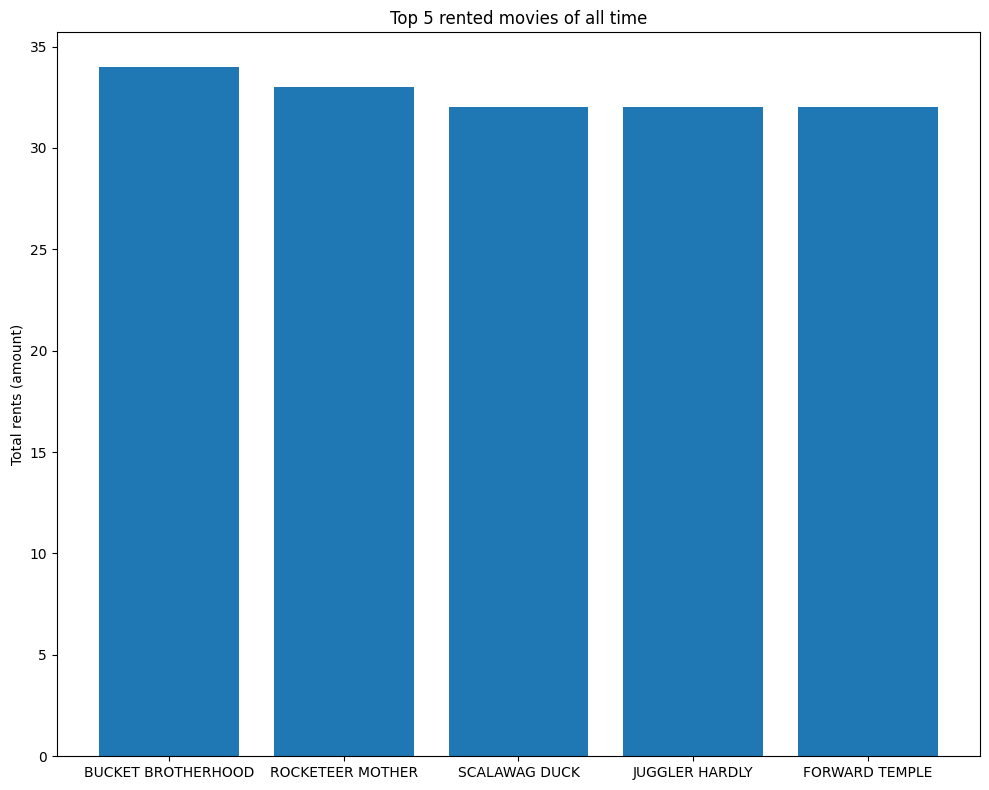

In [26]:
plt.figure(figsize=(10,8))
plt.bar(
    mostrentedmovie["title"],
    mostrentedmovie["howmanytimesrented"]
)
plt.title("Top 5 rented movies of all time")
plt.ylabel("Total rents (amount)")
plt.tight_layout()
plt.show()